In [1]:
#importing libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [4]:
#importing the dataset

In [5]:
df1=pd.read_csv('bigmart.csv')

In [6]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df=df1.copy()  #making a copy of original 

In [8]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
df.dtypes        # checking data types of all the column

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [10]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
df.shape

(1255, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            1255 non-null   object 
 1   Item_Weight                1022 non-null   float64
 2   Item_Fat_Content           1255 non-null   object 
 3   Item_Visibility            1255 non-null   float64
 4   Item_Type                  1255 non-null   object 
 5   Item_MRP                   1255 non-null   float64
 6   Outlet_Identifier          1255 non-null   object 
 7   Outlet_Establishment_Year  1255 non-null   int64  
 8   Outlet_Size                897 non-null    object 
 9   Outlet_Location_Type       1255 non-null   object 
 10  Outlet_Type                1255 non-null   object 
 11  Item_Outlet_Sales          1255 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 117.8+ KB


In [13]:
import seaborn as sns
from matplotlib import pyplot as plt

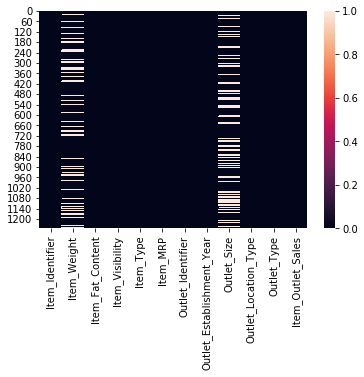

In [14]:
sns.heatmap(df.isnull())   #checking if there is any null values present or not

In [15]:
#filling the null values in dataset

In [16]:
df.isnull().sum()

Item_Identifier                0
Item_Weight                  233
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  358
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [17]:
df["Item_Weight"]=df.fillna(df["Item_Weight"].mean())

In [18]:
df["Item_Weight"].isnull().sum()

0

In [19]:
df["Outlet_Size"]=df.fillna(df["Outlet_Size"].mode())

In [20]:
df["Outlet_Size"].isnull().sum()

0

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()    #changing object dtype to int dtype

In [23]:
df["Outlet_Size"]=le.fit_transform(df["Outlet_Size"])

In [24]:
df["Outlet_Size"]

0       100
1         4
2       386
3       638
4       745
       ... 
1250    298
1251    765
1252     19
1253      6
1254    254
Name: Outlet_Size, Length: 1255, dtype: int32

In [25]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,100,Tier 1,Supermarket Type1,3735.1380
1,DRC01,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,4,Tier 3,Supermarket Type2,443.4228
2,FDN15,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,386,Tier 1,Supermarket Type1,2097.2700
3,FDX07,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,638,Tier 3,Grocery Store,732.3800
4,NCD19,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,745,Tier 3,Supermarket Type1,994.7052


In [26]:
df.drop("Item_Identifier",axis=1,inplace=True) #dropping the irrelevant columns

In [27]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [28]:
col=["Item_Weight","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Location_Type","Outlet_Type"]

In [29]:
for i in col:
    df[i]=le.fit_transform(df[i])

In [30]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,100,1,0.016047,4,249.8092,9,1999,100,0,1,3735.1380
1,4,2,0.019278,14,48.2692,3,2009,4,2,2,443.4228
2,386,1,0.016760,10,141.6180,9,1999,386,0,1,2097.2700
3,638,2,0.000000,6,182.0950,0,1998,638,2,0,732.3800
4,745,1,0.000000,9,53.8614,1,1987,745,2,1,994.7052


In [31]:
# checking the datatypes of each column after changing dtype through label encoder

In [32]:
df.dtypes

Item_Weight                    int32
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object

In [33]:
df["Item_MRP"].astype(int)

0       249
1        48
2       141
3       182
4        53
       ... 
1250    193
1251    246
1252    189
1253    124
1254    260
Name: Item_MRP, Length: 1255, dtype: int32

In [34]:
#visulaizing the data

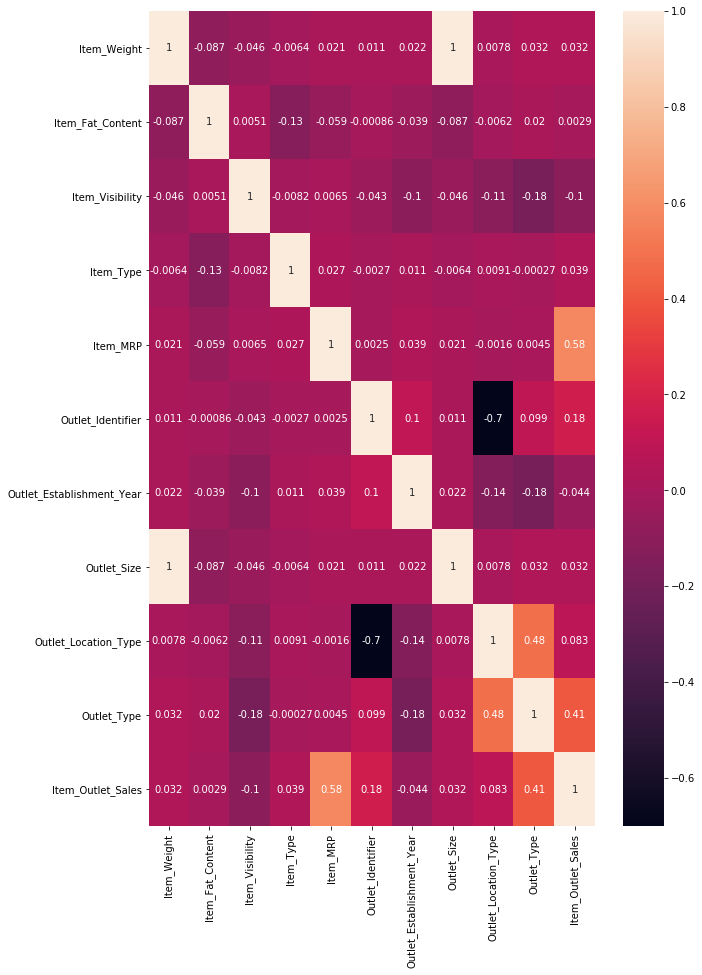

In [35]:
plt.figure(figsize=(10,15))
sns.heatmap(df.corr(),annot=True)

Text(0, 0.5, 'fat content')

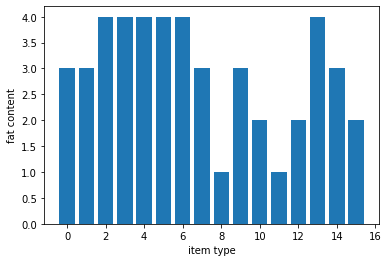

In [36]:
plt.bar(df["Item_Type"],df["Item_Fat_Content"])
plt.xlabel("item type")
plt.ylabel("fat content")

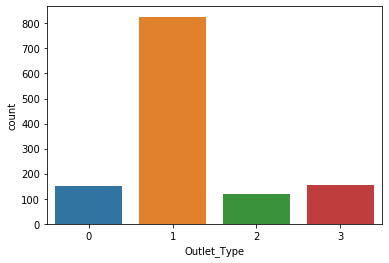

In [37]:
sns.countplot(df["Outlet_Type"])

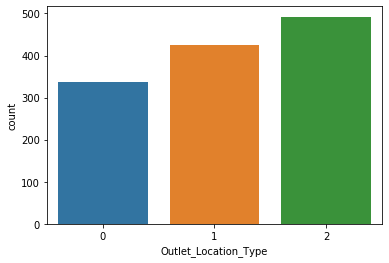

In [38]:
sns.countplot(df["Outlet_Location_Type"])

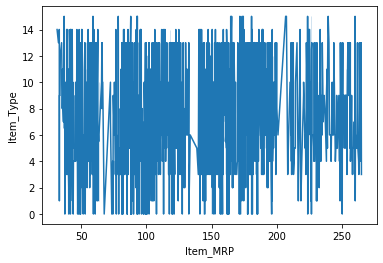

In [39]:
sns.lineplot(df["Item_MRP"],df["Item_Type"])

<BarContainer object of 1255 artists>

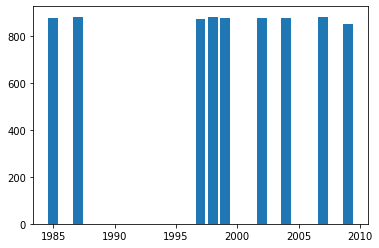

In [40]:
plt.bar(df["Outlet_Establishment_Year"],df["Outlet_Size"])

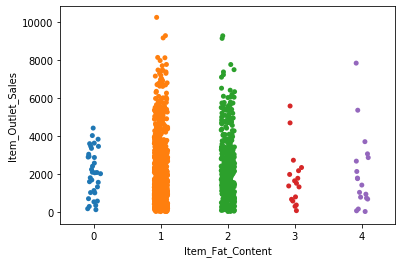

In [41]:
sns.stripplot(df["Item_Fat_Content"],df["Item_Outlet_Sales"])

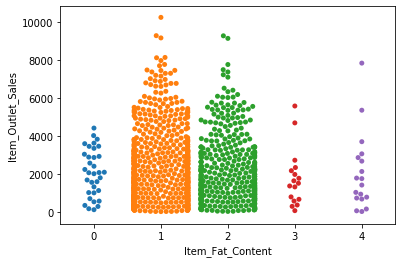

In [42]:
sns.swarmplot(df["Item_Fat_Content"],df["Item_Outlet_Sales"])

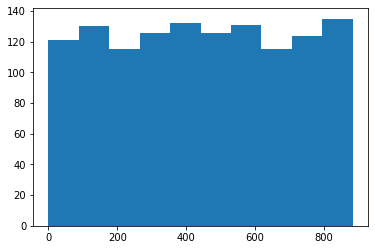

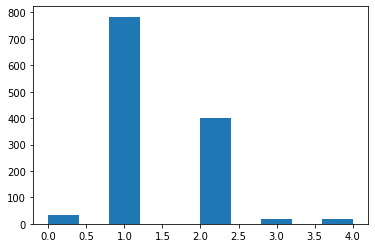

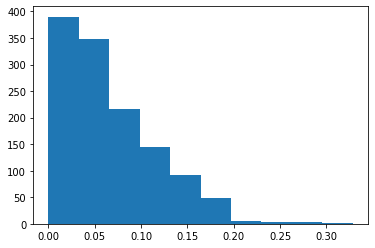

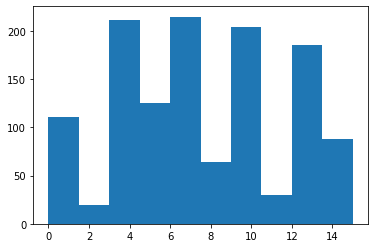

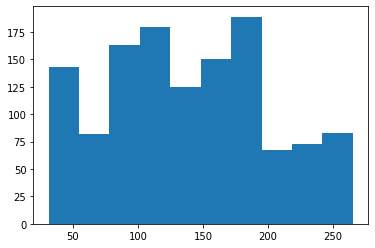

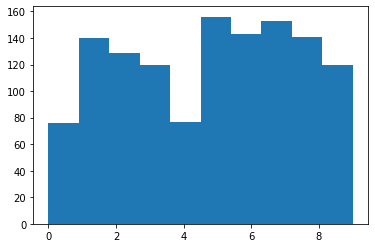

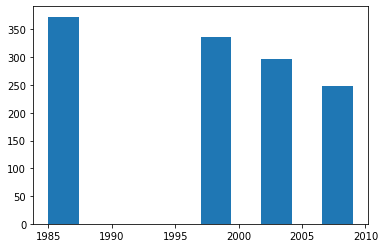

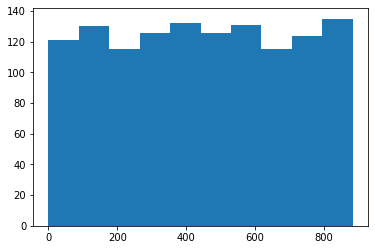

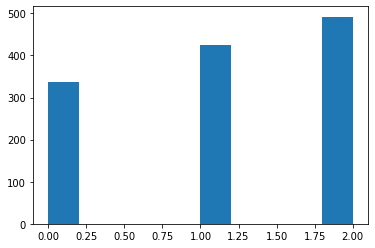

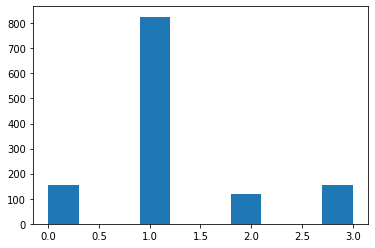

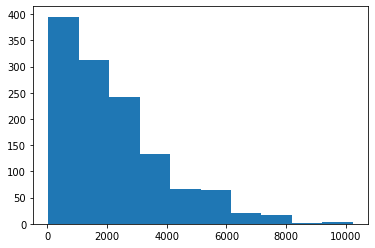

In [43]:
for i in df.columns:
    plt.figure()
    plt.hist(df[i])

In [44]:
x=df.drop("Item_Outlet_Sales",axis=1)

In [45]:
y=df["Item_Outlet_Sales"].values

In [46]:
y=y.reshape(-1,1)

In [47]:
y.shape

(1255, 1)

In [48]:
x.shape

(1255, 10)

In [49]:
#removing outliers from dataset
from scipy.stats import zscore

In [50]:
z=np.abs(zscore(x))

In [51]:
print(np.where(z>3))

(array([  49,   81,   83,  108,  151,  174,  199,  339,  396,  434,  489,
        502,  521,  532,  615,  727,  753,  838,  854,  891, 1010, 1034,
       1090, 1124, 1133, 1159, 1183, 1209], dtype=int64), array([2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1], dtype=int64))


In [52]:
x_new=x[(z<3).all(axis=1)]

In [53]:
x.shape

(1255, 10)

In [54]:
x_new.shape

(1227, 10)

In [55]:
#splitting data in x_train and y_train and predicting the result using linear reg algo

In [85]:
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.33)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2_scr=r2_score(pred,y_test)
    print("r2 score for corrosponding random state ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
        
print()
print("max r2 score corrosponding to the final r state",final_r_state,"is: ",max_r_score)

r2 score for corrosponding random state  42 is:  0.09407182129154246
r2 score for corrosponding random state  43 is:  -0.06784752192573351
r2 score for corrosponding random state  44 is:  -0.054981250894814426
r2 score for corrosponding random state  45 is:  0.05326564471488626
r2 score for corrosponding random state  46 is:  0.09853765779283818
r2 score for corrosponding random state  47 is:  0.05187826455826283
r2 score for corrosponding random state  48 is:  -0.09003072712143112
r2 score for corrosponding random state  49 is:  0.13482610402742146
r2 score for corrosponding random state  50 is:  -0.08412717045453322
r2 score for corrosponding random state  51 is:  0.08154767950315034
r2 score for corrosponding random state  52 is:  0.16708439245965734
r2 score for corrosponding random state  53 is:  0.049158918523867556
r2 score for corrosponding random state  54 is:  -0.02502202820589705
r2 score for corrosponding random state  55 is:  0.007014042595169356
r2 score for corrosponding

In [57]:
#finalising the model

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=75,test_size=0.33)

In [59]:
lr=LinearRegression()


In [60]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
lr.coef_

array([[ 6.90246357e-02,  5.53180386e+01, -7.48804437e+02,
         1.92623565e+01,  1.69038697e+01,  6.97101707e+01,
        -5.12164939e+00,  6.90246357e-02, -5.61004710e+01,
         9.08325154e+02]])

In [91]:
float(6.90246357e-02)

0.0690246357

In [62]:
lr.intercept_

array([8494.67237122])

In [63]:
predlr=lr.predict(x_test)

In [64]:
print(predlr)

[[ 3.65324408e+03]
 [ 2.08809453e+03]
 [ 4.38675672e+03]
 [ 4.83723566e+03]
 [ 7.08332290e+02]
 [ 3.90205021e+03]
 [ 1.76901800e+03]
 [ 2.37315281e+03]
 [ 2.42327015e+03]
 [ 2.70120275e+03]
 [ 1.29644487e+03]
 [ 2.65239246e+03]
 [ 3.73857525e+03]
 [ 2.18627815e+03]
 [-8.42089109e+01]
 [ 1.68909214e+03]
 [ 1.66983544e+03]
 [ 2.49696895e+03]
 [ 2.13966461e+03]
 [ 1.22727097e+03]
 [ 1.75129039e+02]
 [ 4.04124687e+03]
 [ 1.22924918e+03]
 [ 3.75024927e+03]
 [ 1.10423918e+03]
 [ 3.41120008e+03]
 [ 2.99420572e+03]
 [ 5.80510113e+02]
 [ 2.87641649e+03]
 [ 5.49759942e+03]
 [ 1.87904138e+03]
 [ 1.80129452e+03]
 [ 3.42508489e+03]
 [ 3.11855382e+03]
 [ 5.98963190e+02]
 [-5.09270252e+02]
 [ 2.58247324e+03]
 [ 3.60627952e+03]
 [ 1.84856302e+03]
 [ 2.56641280e+03]
 [ 9.90929331e+02]
 [ 1.09815400e+03]
 [ 1.80246731e+03]
 [ 4.68205065e+03]
 [ 2.52596938e+03]
 [ 2.47478275e+03]
 [ 2.76714871e+03]
 [ 2.98041255e+03]
 [ 9.27264176e+02]
 [ 1.94751171e+03]
 [ 1.08935666e+03]
 [ 3.66291442e+03]
 [ 3.0780690

In [65]:
print(r2_score(y_test,predlr))

0.5366841661004864


In [66]:
print(mean_absolute_error(y_test,predlr))

879.0575272939162


In [67]:
print(mean_squared_error(y_test,predlr))

1258687.7361925337


In [68]:
# using regularisation method
from sklearn.model_selection import cross_val_score

In [69]:
score=cross_val_score(lr,x,y,cv=5)

In [70]:
score

array([0.52746297, 0.50665171, 0.48918537, 0.49899986, 0.54147999])

In [71]:
#boosting the result

In [72]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor

In [73]:
ad=AdaBoostRegressor(base_estimator=lr)

In [74]:
ad.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True,
                                                  fit_intercept=True,
                                                  n_jobs=None,
                                                  normalize=False),
                  learning_rate=1.0, loss='linear', n_estimators=50,
                  random_state=None)

In [75]:
predad=ad.predict(x_test)

In [76]:
r2_score(y_test,predad)

0.5040301547886554

In [77]:
#by using gradient boosting

In [78]:
gd=GradientBoostingRegressor()


In [79]:
gd.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [80]:
predgd=gd.predict(x_test)

In [81]:
r2_score(predgd,y_test)

0.43504143181601795

In [82]:
#dumping the model by using serialisation

In [83]:
from sklearn.externals import joblib

In [84]:
filename='bigmart.obj'
joblib.dump(lr,open(filename,'wb'))